In [ ]:
Step 0: get data and standartize
Step 1: select k centroids
Step 2.1: apply get_closest() on all the points
Step 2.2: select closests for each cluster
Step 2.3: compute average per cluster
Step 3: Repeat step 2 until stopping criteria is met (max iter number)
Step 4: Visualize

Kmeans(data, 5)
Funcs:
    - get_distance()
    - get_closest() -> get point, and centroids -> find the closest centroid 
     

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

: 

In [9]:
def generate_data(n_samples=400, centers=4, cluster_std=1.0, seed=509):
    """
    Uses make_blobs to create n_samples in 2D, 
    with visually distinct clusters.
    """
    X, _ = make_blobs(n_samples=n_samples,
                      centers=centers,
                      cluster_std=cluster_std,
                      random_state=seed)
    return X


In [104]:
data = generate_data(cluster_std=.5)

min_max_scaler = MinMaxScaler()

data = min_max_scaler.fit_transform(data)

In [105]:
x1 = data[:, 0]
x2 = data[:, 1]

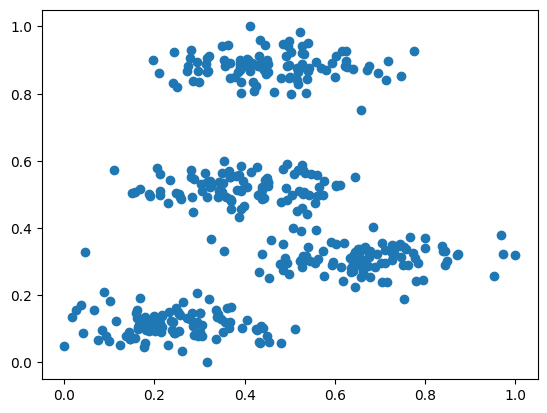

In [106]:
plt.scatter(x1, x2)

In [107]:
def generate_random_points(data, k, random_state=509):
    """
    Generate k random points from the data as initial centroids.
    """
    np.random.seed(random_state)
    
    minimum = np.min(data, axis=0)
    maximum = np.max(data, axis=0)
    dim = data.shape[1]
    
    return np.random.uniform(minimum, maximum, size=(k, dim))
    
    
    

In [108]:
generate_random_points(data, 3)

array([[0.75587305, 0.25087828],
       [0.70583779, 0.37767042],
       [0.72290064, 0.60701375]])

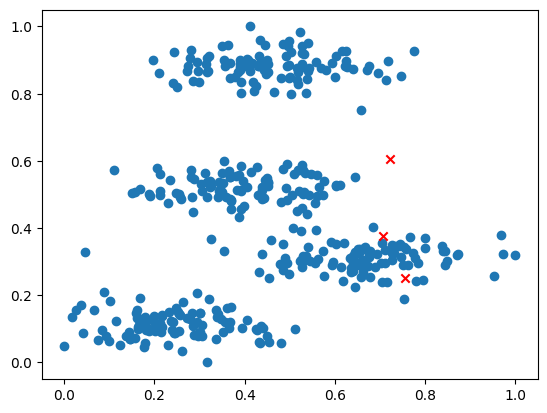

In [109]:
random_centroids = select_random_points(data, 3)

plt.scatter(x1, x2)
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', 
            marker='x', label='Centroids')


In [110]:
random_centroids

array([[0.75587305, 0.25087828],
       [0.70583779, 0.37767042],
       [0.72290064, 0.60701375]])

In [111]:
def get_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


def get_closest_centroid(point, centroids):
    distances = []
    for c in centroids: 
        distance = get_distance(point, c)
        distances.append(distance)
        
    return np.argmin(distances)

In [112]:
def get_clusters(data, centroids):
    labels = []
    for point in data:
        closest_index = get_closest_centroid(point, centroids)
        labels.append(closest_index)
    return np.array(labels)

In [113]:
labels = get_clusters(data, random_centroids)

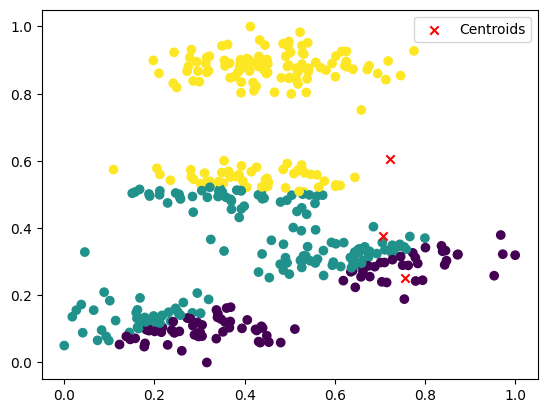

In [114]:
plt.scatter(x1, x2, c=labels)
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', 
            marker='x', label='Centroids')
plt.legend()

In [115]:
def update_centroids(data, labels):
    new_centroids = []
    for c in range(np.max(labels)+1):
        points = data[labels==c] # logical / boolean indexing
        new_centroids.append(np.mean(points, axis=0))
    return np.array(new_centroids)

In [116]:
new_centroids = update_centroids(data, labels)

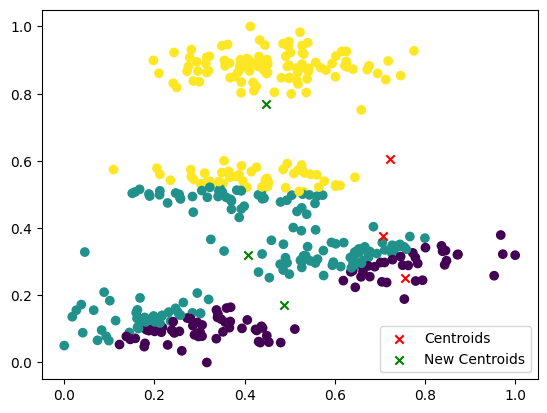

In [117]:
plt.scatter(x1, x2, c=labels)
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', 
            marker='x', label='Centroids')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='green',
            marker='x', label='New Centroids')

plt.legend()

In [118]:
def get_inertia(data, centroids, labels):
    """
    Calculate the inertia (sum of squared distances) for the current clustering.
    """
    inertia = 0
    for c in range(np.max(labels)+1):
        points = data[labels==c]
        centroid = centroids[c]
        inertia += np.sum((points - centroid) ** 2)
    return inertia

In [119]:
def kmeans(data, k, max_iter=10):
    centroids = generate_random_points(data, k)
    
    for i in range(max_iter):
        labels = get_clusters(data, centroids)
        centroids = update_centroids(data, labels)
        print(i, centroids)
        
        inertia = get_inertia(data, centroids, labels)
        info = f"{i}: Inertia = {inertia:.2f}"
        
        fig = plt.figure(figsize=(8, 6))
        plt.scatter(data[:, 0], data[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', 
                marker='x', label='Centroids')
        plt.title(info)
        plt.legend()
        plt.show()
        plt.close(fig)
    return centroids, labels
    

0 [[0.77746518 0.29201675]
 [0.50399202 0.39985286]
 [0.44724844 0.76831241]
 [0.26002141 0.12325765]]


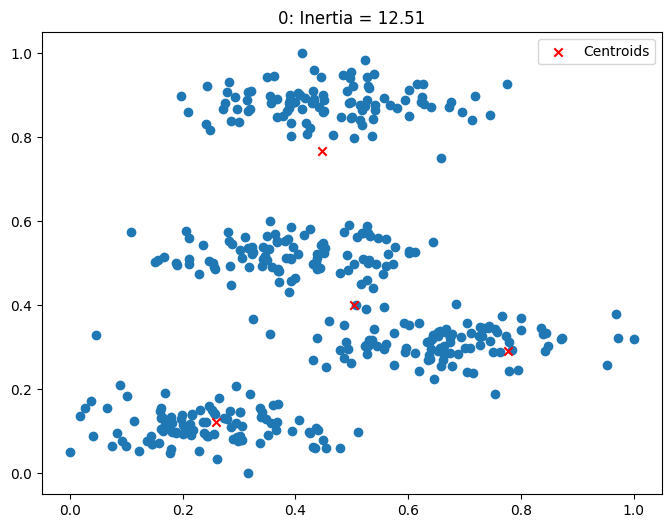

1 [[0.73189937 0.30848729]
 [0.43626878 0.46105571]
 [0.44590087 0.85150536]
 [0.24112339 0.11402909]]


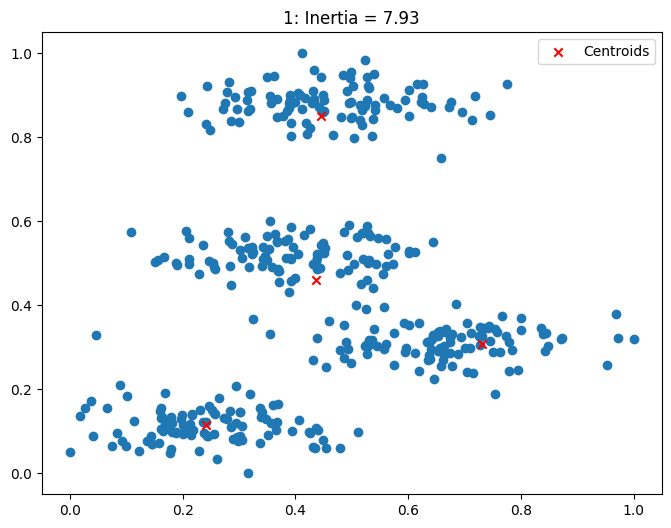

2 [[0.71141794 0.30905943]
 [0.41203553 0.48505275]
 [0.4599436  0.88174893]
 [0.24112339 0.11402909]]


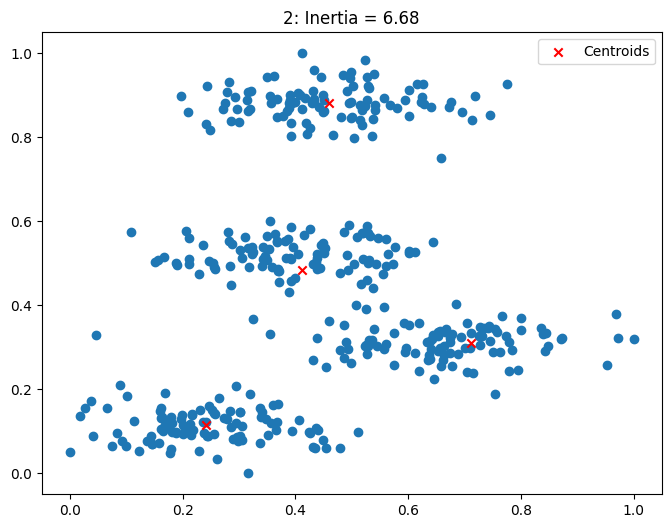

3 [[0.69437794 0.30863512]
 [0.40395961 0.49783914]
 [0.4599436  0.88174893]
 [0.24112339 0.11402909]]


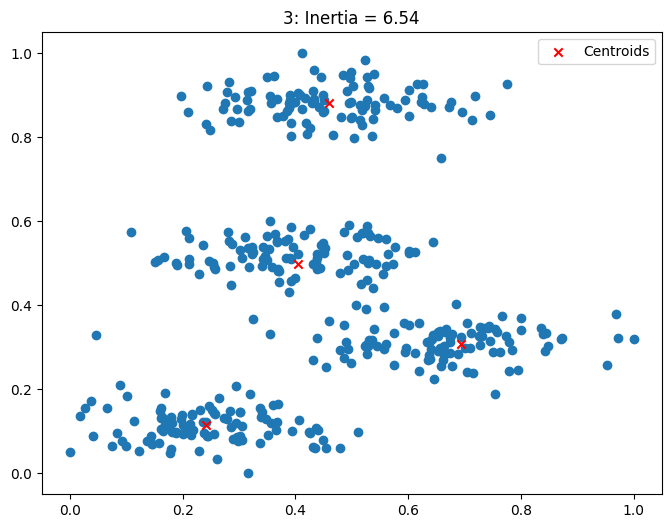

4 [[0.68142193 0.30832815]
 [0.3989353  0.50871552]
 [0.4599436  0.88174893]
 [0.24112339 0.11402909]]


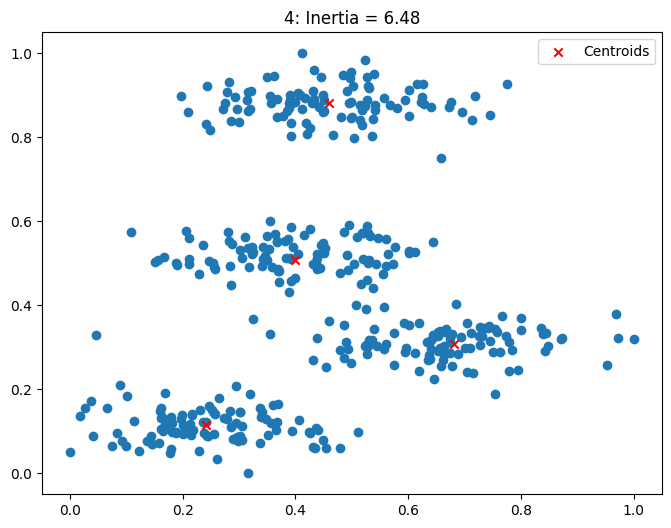

5 [[0.67924499 0.30868396]
 [0.3966174  0.50831579]
 [0.4599436  0.88174893]
 [0.23839331 0.11417716]]


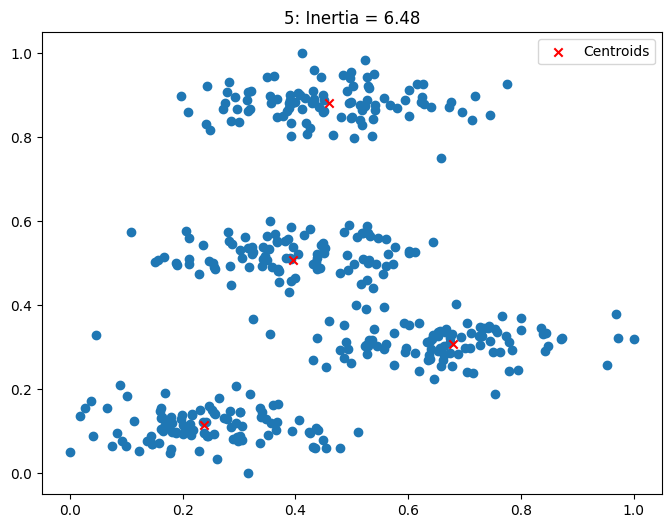

6 [[0.67924499 0.30868396]
 [0.3966174  0.50831579]
 [0.4599436  0.88174893]
 [0.23839331 0.11417716]]


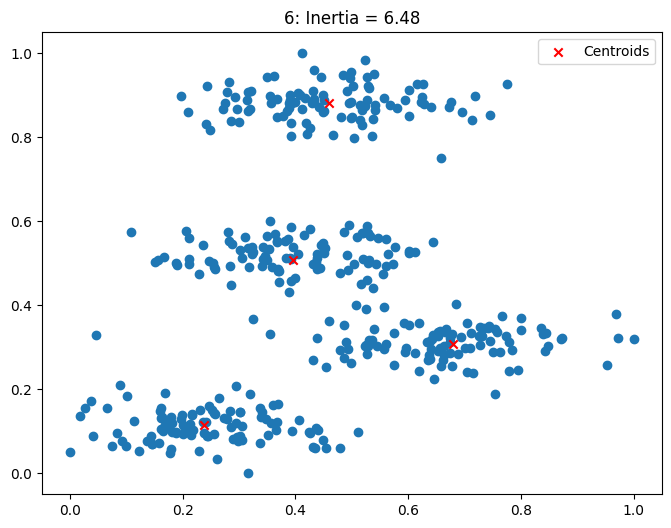

7 [[0.67924499 0.30868396]
 [0.3966174  0.50831579]
 [0.4599436  0.88174893]
 [0.23839331 0.11417716]]


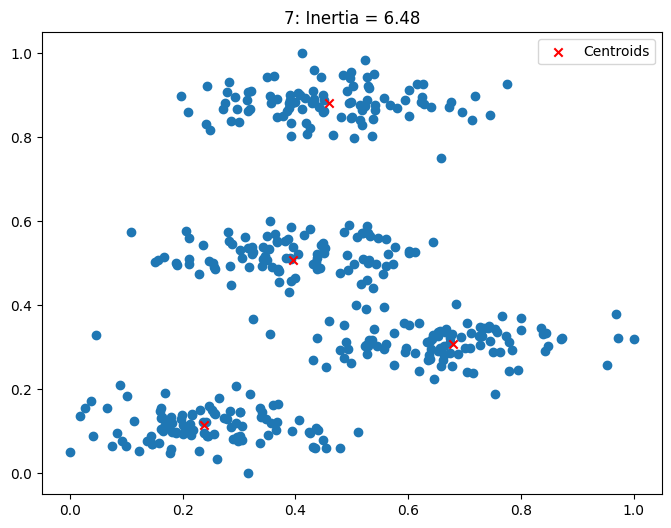

8 [[0.67924499 0.30868396]
 [0.3966174  0.50831579]
 [0.4599436  0.88174893]
 [0.23839331 0.11417716]]


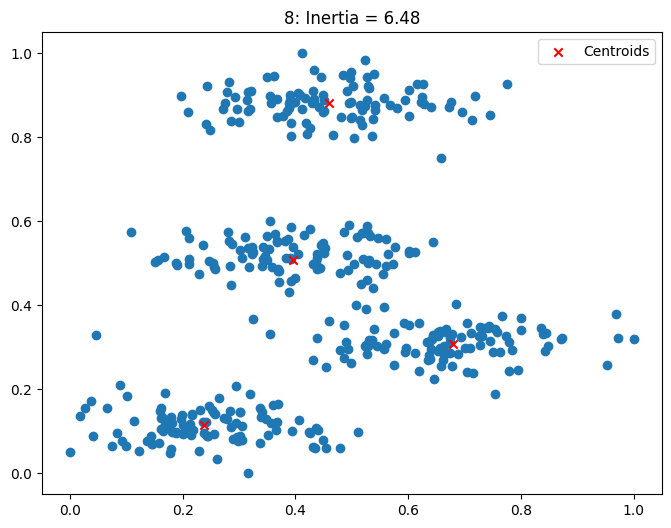

9 [[0.67924499 0.30868396]
 [0.3966174  0.50831579]
 [0.4599436  0.88174893]
 [0.23839331 0.11417716]]


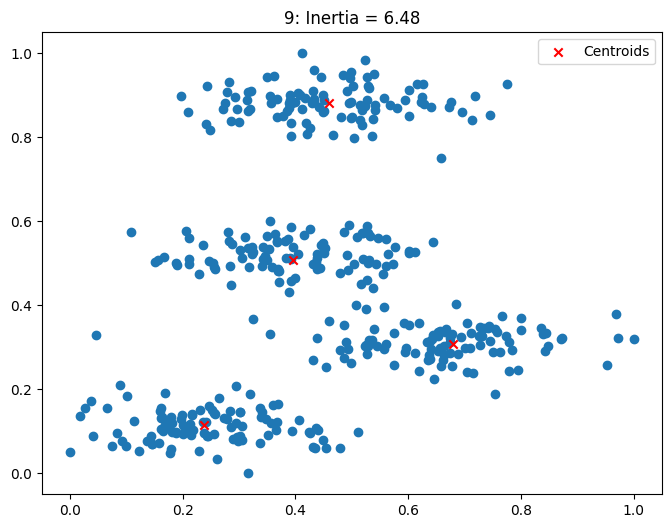

(array([[0.67924499, 0.30868396],
        [0.3966174 , 0.50831579],
        [0.4599436 , 0.88174893],
        [0.23839331, 0.11417716]]),
 array([0, 2, 1, 2, 3, 3, 1, 3, 2, 0, 3, 3, 2, 3, 0, 2, 0, 1, 1, 2, 0, 1,
        2, 3, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 3, 2, 3, 2, 3, 0, 3, 3, 2,
        2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 1, 0,
        1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 3, 3, 1, 1, 2, 2, 0, 3, 3, 1, 2,
        1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 1, 1, 2, 2, 3, 1, 1, 1, 0, 0, 1, 3,
        3, 3, 3, 1, 3, 1, 1, 3, 1, 0, 1, 0, 2, 3, 1, 3, 0, 3, 1, 3, 3, 2,
        3, 1, 3, 3, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 3, 0,
        2, 1, 0, 3, 2, 1, 0, 2, 2, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3, 1, 2, 3,
        2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 3, 0, 0, 1, 3, 3, 3, 0, 0,
        2, 2, 1, 3, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 0, 1, 0, 1, 2, 3, 2, 1,
        3, 1, 3, 2, 0, 1, 2, 3, 1, 2, 3, 3, 3, 2, 1, 3, 0, 1, 2, 0, 3, 2,
        1, 2, 1, 1, 3, 3, 0, 2, 0, 2, 1, 2, 1, 2

In [120]:
kmeans(data, 4)

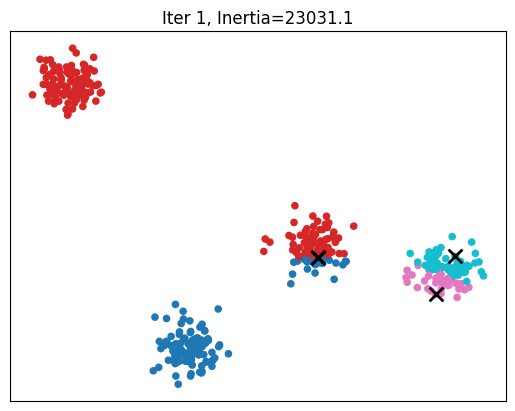

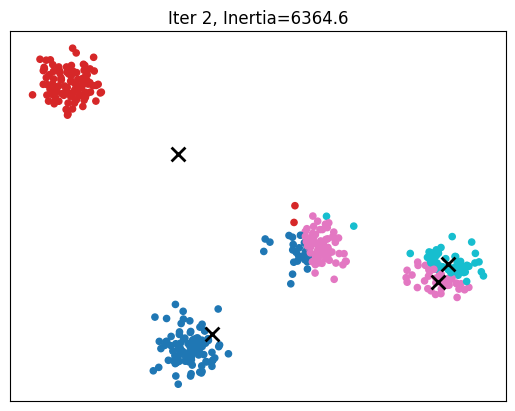

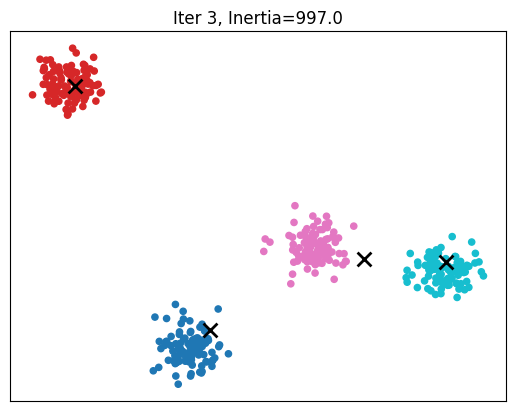

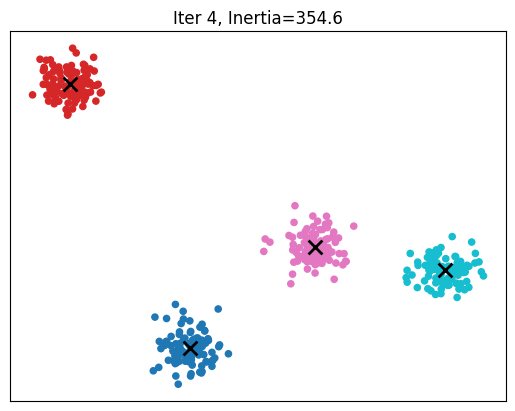

Converged at iteration 4


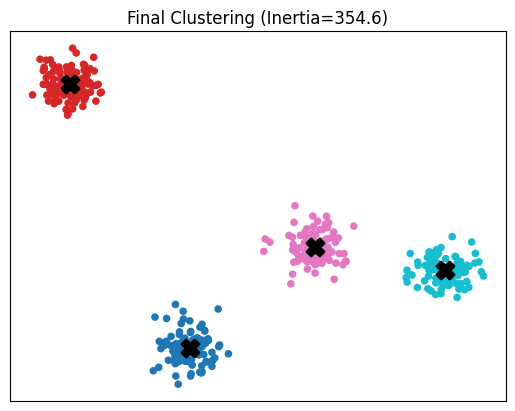

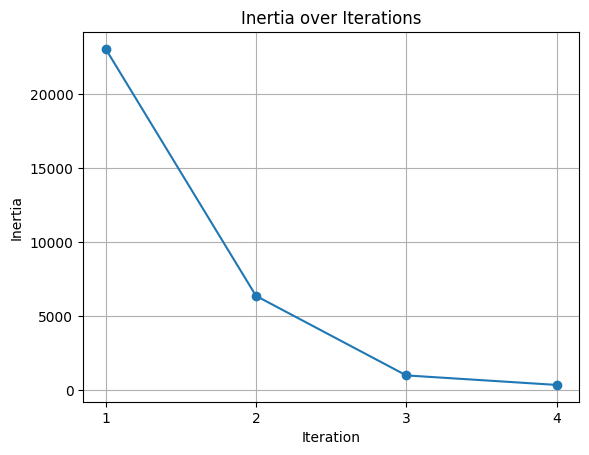

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ----------------------------------------
# 1. Generate synthetic 2D blobs
# ----------------------------------------
def generate_data(n_samples=400, centers=4, cluster_std=1.0, seed=42):
    """
    Uses make_blobs to create n_samples in 2D, 
    with visually distinct clusters.
    """
    X, _ = make_blobs(n_samples=n_samples,
                      centers=centers,
                      cluster_std=cluster_std,
                      random_state=seed)
    return X

# ----------------------------------------
# 2. Euclidean distances w/o broadcasting
# ----------------------------------------
def euclidean_distance(data, centroids):
    """
    Compute distance matrix D of shape (n_samples, k)
    without broadcasting.
    """
    n_samples = data.shape[0]
    k = centroids.shape[0]
    D = np.zeros((n_samples, k))
    for i in range(n_samples):
        for j in range(k):
            dx = data[i,0] - centroids[j,0]
            dy = data[i,1] - centroids[j,1]
            D[i, j] = np.sqrt(dx*dx + dy*dy)
    return D

# ----------------------------------------
# 3. Initialize centroids by sampling points
# ----------------------------------------
def initialize_centroids(data, k, seed=None):
    if seed is not None:
        np.random.seed(seed)
    idx = np.random.choice(data.shape[0], k, replace=False)
    return data[idx]

# ----------------------------------------
# 4. Assign each point to nearest centroid
# ----------------------------------------
def assign_clusters(data, centroids):
    D = euclidean_distance(data, centroids)
    return np.argmin(D, axis=1)

# ----------------------------------------
# 5. Update centroids as cluster means
# ----------------------------------------
def update_centroids(data, labels, k):
    new_centers = np.zeros((k, 2))
    for j in range(k):
        pts = data[labels == j]
        if len(pts) > 0:
            new_centers[j] = pts.mean(axis=0)
    return new_centers

# ----------------------------------------
# 6. Calculate inertia (sum of squared distances)
# ----------------------------------------
def compute_inertia(data, labels, centroids):
    inertia = 0.0
    for i, x in enumerate(data):
        center = centroids[labels[i]]
        dx = x[0] - center[0]
        dy = x[1] - center[1]
        inertia += dx*dx + dy*dy
    return inertia

# ----------------------------------------
# 7. K-means algorithm with simple plots
# ----------------------------------------
def kmeans(data, k, max_iters=10, tol=1e-4, seed=None, plot=True):
    centroids = initialize_centroids(data, k, seed)
    inertias = []
    for it in range(1, max_iters+1):
        labels = assign_clusters(data, centroids)
        inertia = compute_inertia(data, labels, centroids)
        inertias.append(inertia)
        
        if plot:
            plt.scatter(data[:,0], data[:,1], c=labels, s=20, cmap='tab10')
            plt.scatter(centroids[:,0], centroids[:,1],
                        marker='x', s=100, linewidths=2, c='k')
            plt.title(f'Iter {it}, Inertia={inertia:.1f}')
            plt.xticks([])
            plt.yticks([])
            plt.show()
        
        new_centroids = update_centroids(data, labels, k)
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        centroids = new_centroids
        
        if np.all(shifts < tol):
            if plot:
                print(f"Converged at iteration {it}")
            break

    # final assignment
    final_labels = assign_clusters(data, centroids)
    return final_labels, centroids, inertias

# ----------------------------------------
# 8. Run it all
# ----------------------------------------
if __name__ == '__main__':
    # generate data
    data = generate_data(n_samples=400, centers=4, cluster_std=0.7, seed=2025)
    
    # cluster it
    labels, centers, inertias = kmeans(
        data, k=4, max_iters=15, tol=1e-3, seed=2025, plot=True
    )
    
    # final clustering plot
    plt.scatter(data[:,0], data[:,1], c=labels, s=20, cmap='tab10')
    plt.scatter(centers[:,0], centers[:,1],
                marker='X', s=150, linewidths=2, c='k')
    plt.title(f'Final Clustering (Inertia={inertias[-1]:.1f})')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # inertia curve
    plt.plot(range(1, len(inertias)+1), inertias, marker='o')
    plt.title('Inertia over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia')
    plt.xticks(range(1, len(inertias)+1))
    plt.grid(True)
    plt.show()
